# statistics - descriptive,inferential
there are two types of statistics in data scioence which mentioned above we are starting from DESCRIPTIVE 

### ~measures of central tendency - mean,mode,median

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loading datasets for work on real data

In [6]:
dataset=pd.read_csv("titanic.csv")
dataset.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


**for mean**

In [7]:
dataset["age"].mean()

29.69911764705882

In [15]:
mn=np.mean(dataset["age"])

*graphical representation of mean of age*

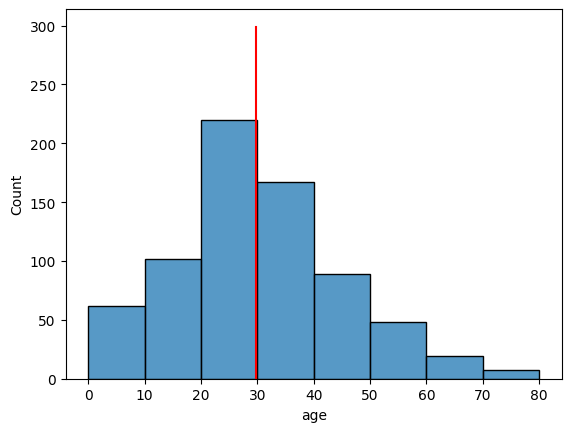

In [19]:
sns.histplot(x="age",data=dataset,bins=[i for i in range(0,81,10)])
plt.plot([mn for i in range(0,300)],[i for i in range(0,300)],c="red")
plt.show()

**for median**

In [20]:
dataset["age"].median()

28.0

In [23]:
np.median(dataset["age"])


nan

if there is nan then we have to check data info or fill nan with value

In [24]:
dataset.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [27]:
dataset["age"].fillna(dataset['age'].mean(),inplace=True)

C:\Users\rajni\AppData\Local\Temp\ipykernel_4936\550379902.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["age"].fillna(dataset['age'].mean(),inplace=True)


In [28]:
np.median(dataset["age"])

29.69911764705882

In [31]:
md=dataset["fare"].median()
md

14.4542

*graphical representation of median of fare*

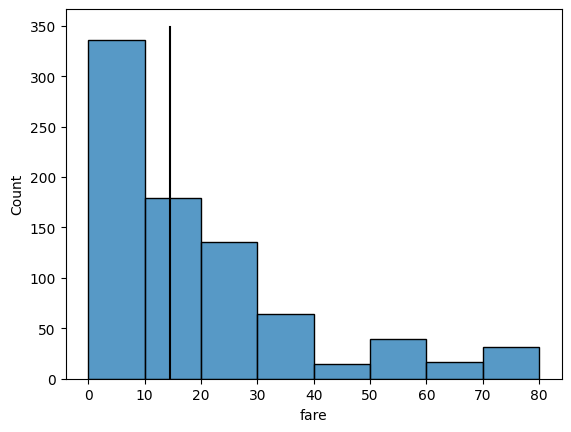

In [33]:
sns.histplot(x="fare",data=dataset,bins=[i for i in range(0,81,10)])
plt.plot([md for i in range(0,350)],[i for i in range(0,350)],c="black")
plt.show()

**for mode**

In [47]:
mo=dataset["embark_town"].mode()[0]
mo

'Southampton'

In [45]:
dataset["embark_town"].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

*graphical representation of mode of embark_town*

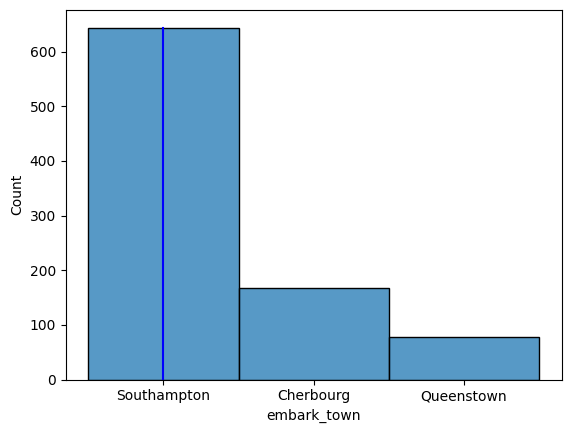

In [49]:
sns.histplot(x="embark_town",data=dataset,bins=[i for i in range(0,81,10)])
plt.plot([mo for i in range(0,645)],[i for i in range(0,645)],c="blue")
plt.show()

graphical represntation of mean mode median at single graph

In [56]:
mo=dataset["fare"].mode()[0]
mo


8.05

In [58]:
mn=dataset["fare"].mean()
mn

32.204207968574636

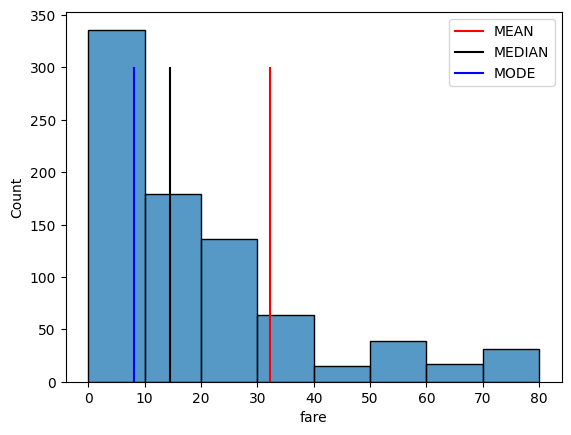

In [60]:
sns.histplot(x="fare",data=dataset,bins=[i for i in range(0,81,10)])

plt.plot([mn for i in range(0,300)],[i for i in range(0,300)],c="red",label="MEAN")
plt.plot([md for i in range(0,300)],[i for i in range(0,300)],c="black",label="MEDIAN")
plt.plot([mo for i in range(0,300)],[i for i in range(0,300)],c="blue",label="MODE")

plt.legend()
plt.show()

### ~measures of variability - range,mean absolute division,variance,standard deviation

**working on Range---->>max-min**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
dataset=pd.read_csv("tips.csv")
dataset.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [72]:
dataset["total_bill"].max()

50.81

In [74]:
dataset["total_bill"].min()

3.07

In [75]:
rge=dataset["total_bill"].max()-dataset["total_bill"].min()
rge

47.74

graphical representation of range 

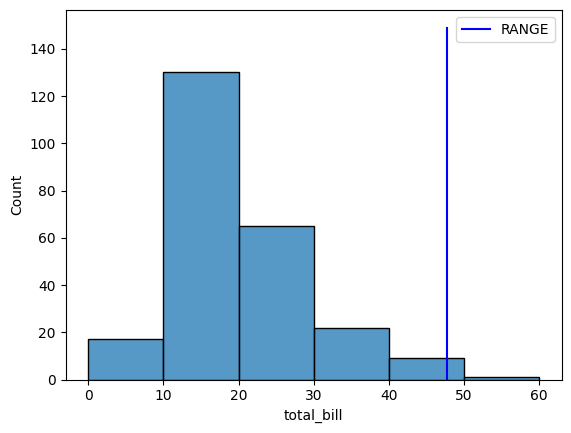

In [80]:
sns.histplot(x="total_bill",data=dataset,bins=[i for i in range(0,70,10)])

plt.plot([rge for i in range(0,150)],[i for i in range(0,150)],c="blue",label="RANGE")

plt.legend()
plt.show()

**working on MEAN ABSOLUTE DIVISION---->>**
in this we take the data which is fast and close to the mean because it works well in ML (this condition is applied only when there is same mean of two data and we have to choose one of them for better analysis)

In [87]:
sec_a=np.array([75,65,73,68,72,67])
sec_b=np.array([90,47,43,96,93,51])
no=np.array([1,2,3,4,5,6])

mean=np.mean(sec_b)

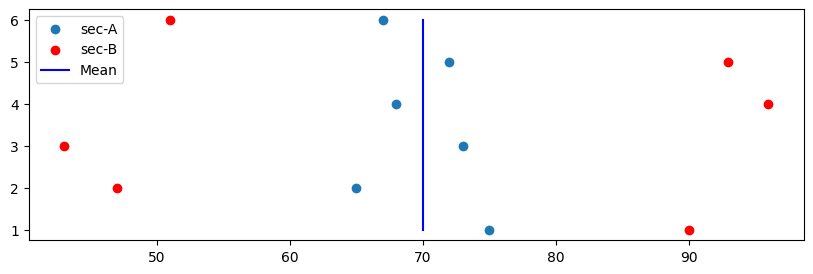

In [90]:
plt.figure(figsize=(10,3))

plt.scatter(sec_a,no,label="sec-A")
plt.scatter(sec_b,no,color="r",label="sec-B")
plt.plot([70,70,70,70,70,70],no,c="blue",label="Mean")

plt.legend()
plt.show()

**by using mean absolute divion method we have to consider that value which is less so that we can aplly better analysis**

abs function consider only positive value

In [94]:
mad_a=np.sum(np.abs(sec_a-mean))/len(sec_a)
mad_b=np.sum(np.abs(sec_b-mean))/len(sec_b)

mad_a,mad_b

(3.3333333333333335, 23.0)

**WORKING ON STANDARD DEVIATION OR VARIANCE===>> Sometimes mean absolute divion have same output in that case we use standard deviation or variance both have kind of same formula standarddeviaton''2=variance**

In [95]:
np.std(sec_a),np.std(sec_b)

(3.559026084010437, 23.18045153428495)

In [96]:
np.var(sec_a),np.var(sec_b)

(12.666666666666666, 537.3333333333334)

WORKING ON REAL DATSET

In [97]:
dataset=pd.read_csv("titanic.csv")
dataset.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [99]:
dataset["age"].var()

211.01912474630802

In [101]:
dataset["age"].std()

14.526497332334042

In [102]:
dataset.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


representation on graph

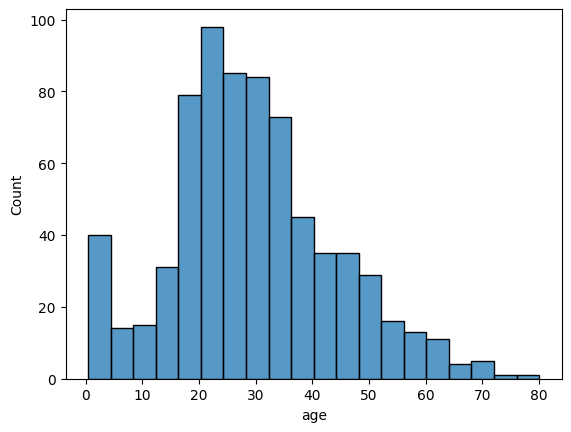

In [100]:
sns.histplot(x="age",data=dataset)
plt.show()

### ~Percentiles and quartiles
percentiles are generally refer to as rankimg system which used in statistics to give a number that describes the value that a given percent of values are lower than and it has no baseline value it changes with no. of persons or objects increases

quartiles are division of percentiles into four parts which is used by IQR(interquartile range) to be used in machine learning when given outliers are gone suddenly out of range 

IQR=quartile 3-quartile 1

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv("titanic.csv")
dataset.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [104]:
dataset.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [109]:
dataset["age"].fillna(dataset["age"].mean(),inplace=True)

max()== 100 percentile        
min()== 0 percentile              
median== 50 percentile

In [110]:
np.percentile(dataset["age"],25),np.percentile(dataset["age"],75)

(22.0, 35.0)

to check the presence of outliers we have to observe the huge difference between 75 percentile or max if the value difference is large then there is outliers present we have also check through diff. between min() or 25 percentile it also depicts the outliers present or not.

AS MENTIONED BELOW~~~ MIN(),25%,75%.MAX()===0.42,22.0,29.68,35.00,80.00
BETWEEN 75% AND MAX()THERE IS HUGE VALUE DIFFERENCE WHICH CONFIRMS THE PRESENCE OF OUTLIERS

In [112]:
dataset.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


FOR OUTLIERS CHECKING THROUGH BOX PLOT 

C:\Users\rajni\AppData\Local\Temp\ipykernel_4936\3334384842.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="age",data=dataset,palette="Greens")


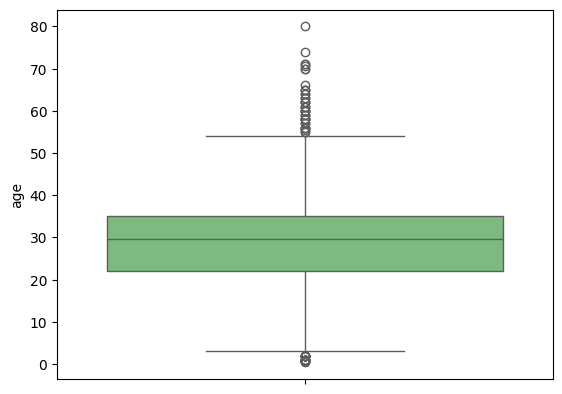

In [120]:
sns.boxplot(y="age",data=dataset,palette="Greens")
plt.show()

### MEASURES OF SHAPE----->>> skewness,frequency,cumulative ferquency

SKEWNESS---THREE TYPES--->> NEGATIVELY SKEWED, NORMAL , POSITIVELY SKEWED                  
*negaively=mean<median<mode , normal=mean,mode,median equal , positively=mode<median<mean*

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv("titanic.csv")
dataset.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


*this is positively skewed*

In [131]:
dataset["age"].skew()

0.38910778230082704

In [143]:
dataset['age'].mean(),dataset['age'].median(),dataset['age'].mode()[0]

(29.69911764705882, 28.0, 24.0)

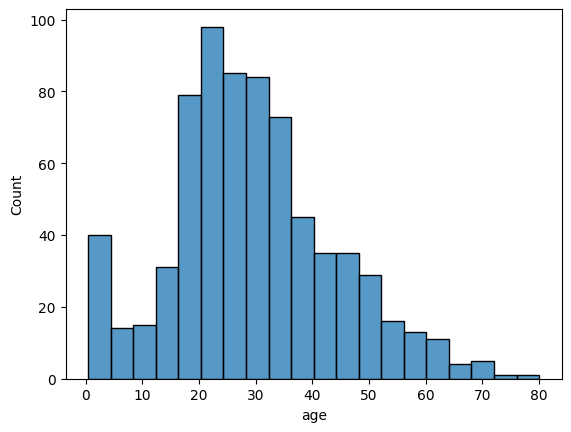

In [132]:
sns.histplot(x="age",data=dataset)
plt.show()

*this is example of negatively skewed*

In [126]:
data=np.random.normal(0,100,100)


In [128]:
df=pd.DataFrame({"x":data})
df["x"].skew()

-0.18271885028582982

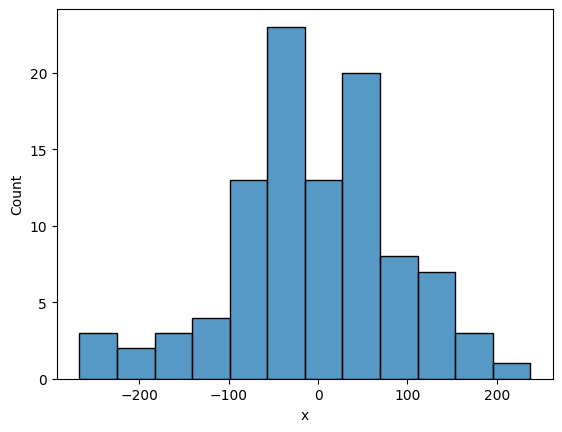

In [130]:
sns.histplot(x="x",data=df)
plt.show()

*this is the examle of normal chart*

In [133]:
data=[2,3,3,4,4,5,5,5,5,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,9,9,9,9,10,10,11,11,12]

In [134]:
df=pd.DataFrame({"x":data})
df["x"].skew()

0.0

In [142]:
df["x"].mean(), df["x"].median(), df["x"].mode()[0]

(7.0, 7.0, 7)

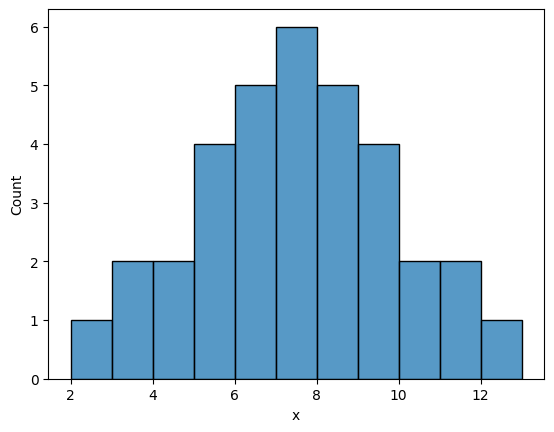

In [140]:
sns.histplot(x="x",data=df,bins=[2,3,4,5,6,7,8,9,10,11,12,13])
plt.show()

 # covariance and correlation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv("tips.csv")
dataset.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [5]:
dataset.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [10]:
data_corr=dataset.select_dtypes(["float64","int64"]).corr()
data_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [11]:
data_cov=dataset.select_dtypes(["float64","int64"]).cov()
data_cov

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


graphical representation of correlation & covariance

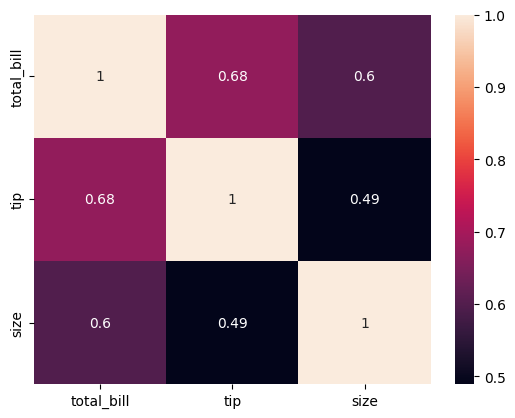

In [13]:
sns.heatmap(data_corr,annot=True)
plt.show()

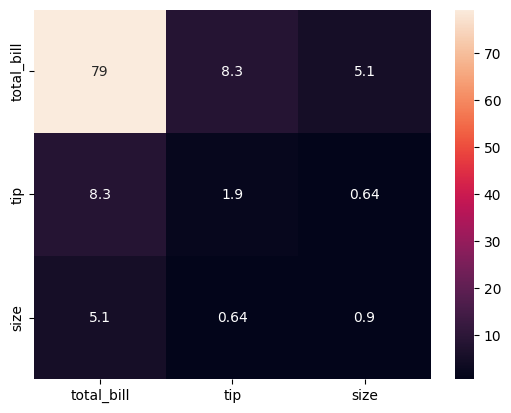

In [14]:
sns.heatmap(data_cov,annot=True)
plt.show()

**CENTRAL LIMIT THEOREM---->>** when plotting a sample distribution of means the means of sample will be equal to the population mean and the sample distribution will approach normal distribution with variance equal to standard error

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

pop_data=[np.random.randint(10,100) for i in range(10000)]
pop_data


[13,
 63,
 38,
 78,
 17,
 92,
 75,
 20,
 75,
 25,
 58,
 12,
 84,
 52,
 27,
 93,
 68,
 34,
 91,
 41,
 42,
 10,
 14,
 82,
 91,
 18,
 10,
 47,
 88,
 39,
 67,
 63,
 80,
 47,
 30,
 56,
 64,
 26,
 20,
 95,
 27,
 80,
 97,
 55,
 34,
 75,
 62,
 47,
 86,
 23,
 41,
 28,
 88,
 26,
 64,
 59,
 26,
 18,
 21,
 98,
 92,
 82,
 21,
 40,
 67,
 44,
 15,
 90,
 20,
 97,
 52,
 14,
 63,
 20,
 77,
 42,
 31,
 91,
 90,
 52,
 54,
 81,
 26,
 28,
 36,
 60,
 48,
 75,
 13,
 99,
 80,
 41,
 80,
 11,
 30,
 86,
 94,
 38,
 12,
 83,
 40,
 36,
 28,
 16,
 91,
 71,
 24,
 99,
 88,
 73,
 74,
 67,
 98,
 83,
 22,
 37,
 75,
 16,
 66,
 97,
 23,
 28,
 86,
 69,
 15,
 82,
 71,
 85,
 83,
 93,
 99,
 58,
 95,
 38,
 59,
 88,
 66,
 35,
 42,
 97,
 16,
 27,
 28,
 45,
 53,
 15,
 57,
 82,
 13,
 61,
 28,
 10,
 17,
 58,
 48,
 24,
 21,
 14,
 51,
 92,
 86,
 97,
 81,
 46,
 93,
 74,
 99,
 24,
 22,
 41,
 11,
 50,
 43,
 90,
 87,
 13,
 36,
 31,
 74,
 18,
 24,
 13,
 70,
 56,
 34,
 51,
 39,
 73,
 85,
 40,
 93,
 90,
 83,
 88,
 22,
 42,
 47,
 31,
 32,
 67,


In [4]:
pop_table=pd.DataFrame({"pop_data":pop_data})
pop_table

,pop_data
0,13
1,63
2,38
3,78
4,17
...,...
9995,32
9996,71
9997,73
9998,22


In [11]:
np.mean(pop_data)

54.5091

this is the population data  normal distribution graph 

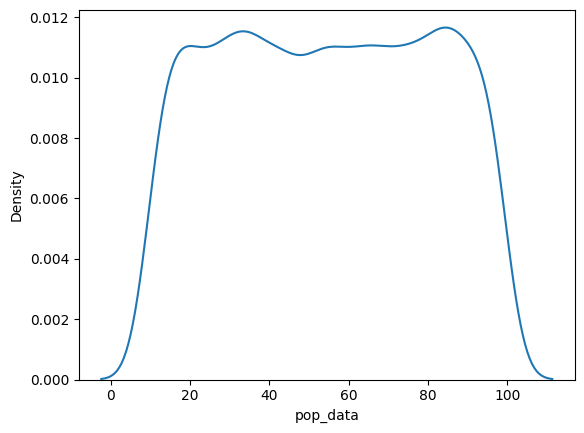

In [5]:
sns.kdeplot(x='pop_data',data=pop_table)
plt.show()

this is the sample of normal distribution graph which shows the same normal distribution part as such that population data have 

In [6]:
sample_mean=[]
for no_sample in range(50):
    sample_data=[]
    for data in range(500):
        sample_data.append(np.random.choice(pop_data))
    sample_mean.append(np.mean(sample_data))

In [10]:
np.mean(sample_mean)

54.4268

In [7]:
sample_M=pd.DataFrame({"Sample_Mean":sample_mean})

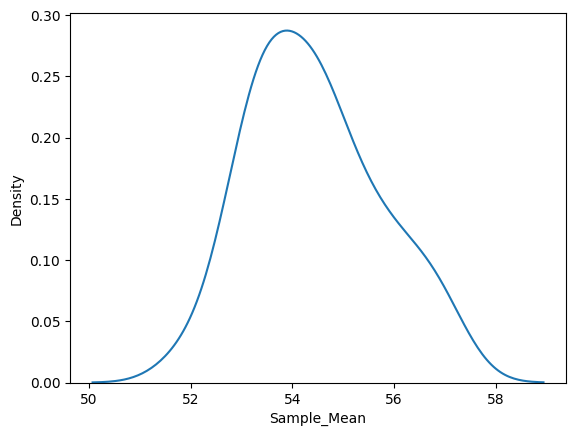

In [8]:
sns.kdeplot(x="Sample_Mean",data=sample_M)
plt.show()

in above we can see that the mean of normal distribution of poulation or sample data is almost same with value of 54...

**HYPOTHESIS TESTING---->>>**  it is the part of statistical analysis, where we test the assumptions made regarding a population parameter. it is generally used when we were to compare a single group with an external standard and two or more groups each other.

there are most commonly three testing mehtods are there like Z-Test, T-Test, chi-square test etc......

**steps of hythsesis testing**               
--state null and alternative hypothesis   
--choose level of significance             
--find critical values                             
--draw your conclusions                

**1. Z-TEST**--->>>> for this test no. of sample will be more than 30

WE CAN CALCULATE Z VALUE USING Z TABLE ON GOOGLE 

**example1**- A teacher claims that the mean score of students in his class is greater than 82 with a standard deviation of 20 . if a sample of 81 students was selected with a mean score of 90

for z-value directly

In [14]:
import scipy.stats as st
import numpy as np

In [13]:
st.norm.ppf(0.95)

1.6448536269514722

for z-calculated 

formula of calculating for ztest=z_cal=(s_x-p_u)/(p_std/np.sqrt(n))

In [16]:
s_x=90
p_u=82
p_std=20
n=81
ap=0.05

z_cal=(s_x-p_u)/(p_std/np.sqrt(n))
z_cal

3.5999999999999996

In [17]:
z_table=st.norm.ppf(1-ap)
z_table

1.6448536269514722

ho = h naught means null hypothsis    
ha = h alpha means alternative hypothesis

In [19]:
if z_table<z_cal:
    print("ha is right")
else:
    print("ho is right")

ha is right


**2. T-TEST**---> for this test no. of sample will be less than 30


WE CAN CALCULATE T VALUE USING T TABLE ON GOOGLE BY FINDING DEGREE OF FREEDOM WHICH IS SAMPLE SPACE-1

**example 1.**--> A manufacturer claims that the average weight of a bag of potato chips is grams. A sample of 25 bags is taken and the average weight is foumd to be grams, with a standard deviation of 5 grams. Test the manufacturer's claim using one-tailed t-test with a significance level of 0.05.

In [20]:
import scipy.stats as st

In [24]:
st.t.ppf(0.05,24) #this is the t value calculated using (alpha,degree of freedom)
                   # as it is one tailed at left side so the value is negtaive 

-1.7108820799094282

In [23]:
t_table=st.t.ppf(0.05,24)
t_table

-1.7108820799094282

**3. CHI SQAURE TEST**--->  works in two situations goodness,independence